# Series

In [1]:
import pandas as pd

## Create a Series Object from a List
- A pandas **Series** is a one-dimensional labelled array.
- A Series combines the best features of a list and a dictionary.
- A Series maintains a single collection of ordered values (i.e. a single column of data).
- We can assign each value an identifier, which does not have to *be* unique.

In [2]:
ice_cream = ['Chocolate','Vanilla','Strawberry','Rum Raisin']
pd.Series(ice_cream)

0     Chocolate
1       Vanilla
2    Strawberry
3    Rum Raisin
dtype: object

In [3]:
lottery_numbers = [4, 8, 15, 16, 23, 42]
pd.Series(lottery_numbers)

0     4
1     8
2    15
3    16
4    23
5    42
dtype: int64

In [4]:
registrations = [True, False, False, True]
pd.Series(registrations)

0     True
1    False
2    False
3     True
dtype: bool

## Create a Series Object from a Dictionary

In [5]:
sushi = {
    'Salmon': 'Orange',
    'Tuna': 'Red',
    'Eel': 'Brown',
}
pd.Series(sushi)

Salmon    Orange
Tuna         Red
Eel        Brown
dtype: object

## Intro to Series Methods
- The syntax to invoke a method on any object is `object.method()`.
- The `sum` method adds together the **Series'** values.
- The `product` method multiplies the **Series'** values.
- The `mean` method finds the average of the **Series'** values.
- The `std` method finds the standard deviation of the **Series'** values.

In [6]:
prices = pd.Series([2.99, 4.45, 1.36])
prices

0    2.99
1    4.45
2    1.36
dtype: float64

In [7]:
prices.sum()

np.float64(8.8)

In [8]:
# multiplicação de todos os elementos dessa lista
prices.product()

np.float64(18.095480000000006)

In [9]:
# média
prices.mean()

np.float64(2.9333333333333336)

In [10]:
# desvio padrão (em relação a média)
prices.std()

np.float64(1.5457791994115246)

## Intro to Attributes
- An **attribute** is a piece of data that lives on an object.
- An **attribute** is a fact, a detail, a characteristic of the object.
- Access an attribute with `object.attribute` syntax.
- The `size` attribute returns a count of the number of values in the **Series**.
- The `is_unique` attribute returns True if the **Series** has no duplicate values.
- The `values` and `index` attributes return the underlying objects that holds the **Series'** values and index labels.

In [11]:
adjectives = pd.Series(["Smart", "Handsome", "Brilliant", 'Humble'])
adjectives

0        Smart
1     Handsome
2    Brilliant
3       Humble
dtype: object

In [12]:
adjectives.size

4

In [13]:
# Verifica se todos os valores são distintos
adjectives.is_unique

True

In [14]:
adjectives.values

array(['Smart', 'Handsome', 'Brilliant', 'Humble'], dtype=object)

In [15]:
adjectives.index

RangeIndex(start=0, stop=4, step=1)

In [16]:
type(adjectives.values)

numpy.ndarray

In [17]:
type(adjectives.index)

pandas.core.indexes.range.RangeIndex

## Parameters and Arguments
- A **parameter** is the name for an expected input to a function/method/class instantiation.
- An **argument** is the concrete value we provide for a parameter during invocation.
- We can pass arguments either sequentially (based on parameter order) or with explicit parameter names written out.
- The first two parameters for the **Series** constructor are `data` and `index`, which represent the values and the index labels.

In [18]:
fruits = ['Apple', 'Orange', 'Plum', 'Grape', 'Blueberry']
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', ' Friday']

In [19]:
# Relação deve ser igual = 5 frutas, 5 dias.
pd.Series(data=weekdays, index=fruits)

Apple           Monday
Orange         Tuesday
Plum         Wednesday
Grape         Thursday
Blueberry       Friday
dtype: object

In [20]:
pd.Series([fruits,weekdays])

0            [Apple, Orange, Plum, Grape, Blueberry]
1    [Monday, Tuesday, Wednesday, Thursday,  Friday]
dtype: object

In [21]:
pd.Series(fruits, index=weekdays)

Monday           Apple
Tuesday         Orange
Wednesday         Plum
Thursday         Grape
 Friday      Blueberry
dtype: object

## Import Series with the pd.read_csv Function
- A **CSV** is a plain text file that uses line breaks to separate rows and commas to separate row values.
- Pandas ships with many different `read_` functions for different types of files.
- The `read_csv` function accepts many different parameters. The first one specifies the file name/path.
- The `read_csv` function will import the dataset as a **DataFrame**, a 2-dimensional table.
- The `usecols` parameter accepts a list of the column(s) to import.
- The `squeeze` method converts a **DataFrame** to a **Series**.

In [22]:
# pd.Series = apenas uma coluna
# df = informação bidimensional
df = pd.read_csv('pokemon.csv', sep=',', header=0, names=['NOME','TIPO'])
df.index = range(1, len(df) + 1)
df

,NOME,TIPO
1,Bulbasaur,"Grass, Poison"
2,Ivysaur,"Grass, Poison"
3,Venusaur,"Grass, Poison"
4,Charmander,Fire
5,Charmeleon,Fire
...,...,...
1006,Iron Valiant,"Fairy, Fighting"
1007,Koraidon,"Fighting, Dragon"
1008,Miraidon,"Electric, Dragon"
1009,Walking Wake,"Water, Dragon"


In [23]:
type(df.index)

pandas.core.indexes.range.RangeIndex

In [24]:
data = {
    'A': [1, 2, 3],
    'B': ['a', 'b', 'c']
}
df = pd.DataFrame(data)
df

,A,B
0,1,a
1,2,b
2,3,c


In [25]:
# usecols: traz apenas as colunas desejadas do df.
# squeeze: funciona apenas com 01 coluna => transforma ele em uma Serie
pokemon = pd.read_csv('pokemon.csv', usecols=['Name']).squeeze
pokemon

<bound method NDFrame.squeeze of               Name
0        Bulbasaur
1          Ivysaur
2         Venusaur
3       Charmander
4       Charmeleon
...            ...
1005  Iron Valiant
1006      Koraidon
1007      Miraidon
1008  Walking Wake
1009   Iron Leaves

[1010 rows x 1 columns]>

In [26]:
google = pd.read_csv('google_stock_price.csv', sep=',', usecols=['Price']).squeeze('columns')
google

0         2.490664
1         2.515820
2         2.758411
3         2.770615
4         2.614201
           ...    
4788    132.080002
4789    132.998001
4790    135.570007
4791    137.050003
4792    138.429993
Name: Price, Length: 4793, dtype: float64

## The head and tail Methods
- The `head` method returns a number of rows from the top/beginning of the `Series`.
- The `tail` method returns a number of rows from the bottom/end of the `Series`.

In [27]:
google = pd.read_csv('google_stock_price.csv', usecols=['Price']).squeeze('columns')
pokemon = pd.read_csv('pokemon.csv', usecols=['Name']).squeeze('columns')

In [28]:
pokemon.head(n=10)

0     Bulbasaur
1       Ivysaur
2      Venusaur
3    Charmander
4    Charmeleon
5     Charizard
6      Squirtle
7     Wartortle
8     Blastoise
9      Caterpie
Name: Name, dtype: object

In [29]:
# retornar a quantidade de linhas desejadas, considerando de baixo para cima.
google.tail(n=5)

4788    132.080002
4789    132.998001
4790    135.570007
4791    137.050003
4792    138.429993
Name: Price, dtype: float64

## Passing Series to Python's Built-In Functions
- The `len` function returns the length of the **Series**.
- The `type` function returns the type of an object.
- The `list` function converts the **Series** to a list.
- The `dict` function converts the **Series** to a dictionary.
- The `sorted` function converts the **Series** to a sorted list.
- The `max` function returns the largest value in the **Series**.
- The `min` function returns the smalllest value in the **Series**.

In [30]:
len(pokemon)
type(pokemon)
# list gera uma lista com todos os valores da coluna
list(pokemon)
# sorted gera uma lista com todos os valores da coluna, em ordem numérica/alfabética
sorted(pokemon)

['Abomasnow',
 'Abra',
 'Absol',
 'Accelgor',
 'Aegislash',
 'Aerodactyl',
 'Aggron',
 'Aipom',
 'Alakazam',
 'Alcremie',
 'Alomomola',
 'Altaria',
 'Amaura',
 'Ambipom',
 'Amoonguss',
 'Ampharos',
 'Annihilape',
 'Anorith',
 'Appletun',
 'Applin',
 'Araquanid',
 'Arbok',
 'Arboliva',
 'Arcanine',
 'Arceus',
 'Archen',
 'Archeops',
 'Arctibax',
 'Arctovish',
 'Arctozolt',
 'Ariados',
 'Armaldo',
 'Armarouge',
 'Aromatisse',
 'Aron',
 'Arrokuda',
 'Articuno',
 'Audino',
 'Aurorus',
 'Avalugg',
 'Axew',
 'Azelf',
 'Azumarill',
 'Azurill',
 'Bagon',
 'Baltoy',
 'Banette',
 'Barbaracle',
 'Barboach',
 'Barraskewda',
 'Basculegion',
 'Basculin',
 'Bastiodon',
 'Baxcalibur',
 'Bayleef',
 'Beartic',
 'Beautifly',
 'Beedrill',
 'Beheeyem',
 'Beldum',
 'Bellibolt',
 'Bellossom',
 'Bellsprout',
 'Bergmite',
 'Bewear',
 'Bibarel',
 'Bidoof',
 'Binacle',
 'Bisharp',
 'Blacephalon',
 'Blastoise',
 'Blaziken',
 'Blipbug',
 'Blissey',
 'Blitzle',
 'Boldore',
 'Boltund',
 'Bombirdier',
 'Bonsly',
 'Bo

In [31]:
sorted(google)

[2.47049,
 2.490664,
 2.509095,
 2.514326,
 2.51582,
 2.51582,
 2.530515,
 2.54795,
 2.553678,
 2.557912,
 2.613952,
 2.614201,
 2.622171,
 2.655795,
 2.676219,
 2.692408,
 2.753679,
 2.758411,
 2.770615,
 2.798012,
 2.849818,
 2.912832,
 2.92404,
 2.959906,
 2.977838,
 2.984065,
 3.012209,
 3.021176,
 3.155672,
 3.235373,
 3.257789,
 3.348449,
 3.353929,
 3.368624,
 3.410218,
 3.41221,
 3.425909,
 3.45505,
 3.512086,
 3.566631,
 3.56962,
 3.596519,
 3.60972,
 3.68693,
 3.74845,
 4.096396,
 4.183569,
 4.209721,
 4.211713,
 4.212461,
 4.240356,
 4.241352,
 4.242847,
 4.247579,
 4.250817,
 4.257293,
 4.259036,
 4.288177,
 4.319559,
 4.336247,
 4.354179,
 4.366135,
 4.378588,
 4.383569,
 4.393532,
 4.401004,
 4.402498,
 4.407231,
 4.411714,
 4.420929,
 4.432137,
 4.432635,
 4.433134,
 4.441602,
 4.453557,
 4.461527,
 4.465014,
 4.465014,
 4.480705,
 4.481951,
 4.481951,
 4.492162,
 4.494155,
 4.494404,
 4.499136,
 4.500631,
 4.50088,
 4.508352,
 4.509348,
 4.512586,
 4.525039,
 4.527032,


In [32]:
# Gera um dicionário usando a Coluna do squeeze
dict(pokemon)

{0: 'Bulbasaur',
 1: 'Ivysaur',
 2: 'Venusaur',
 3: 'Charmander',
 4: 'Charmeleon',
 5: 'Charizard',
 6: 'Squirtle',
 7: 'Wartortle',
 8: 'Blastoise',
 9: 'Caterpie',
 10: 'Metapod',
 11: 'Butterfree',
 12: 'Weedle',
 13: 'Kakuna',
 14: 'Beedrill',
 15: 'Pidgey',
 16: 'Pidgeotto',
 17: 'Pidgeot',
 18: 'Rattata',
 19: 'Raticate',
 20: 'Spearow',
 21: 'Fearow',
 22: 'Ekans',
 23: 'Arbok',
 24: 'Pikachu',
 25: 'Raichu',
 26: 'Sandshrew',
 27: 'Sandslash',
 28: 'Nidoran♀',
 29: 'Nidorina',
 30: 'Nidoqueen',
 31: 'Nidoran♂',
 32: 'Nidorino',
 33: 'Nidoking',
 34: 'Clefairy',
 35: 'Clefable',
 36: 'Vulpix',
 37: 'Ninetales',
 38: 'Jigglypuff',
 39: 'Wigglytuff',
 40: 'Zubat',
 41: 'Golbat',
 42: 'Oddish',
 43: 'Gloom',
 44: 'Vileplume',
 45: 'Paras',
 46: 'Parasect',
 47: 'Venonat',
 48: 'Venomoth',
 49: 'Diglett',
 50: 'Dugtrio',
 51: 'Meowth',
 52: 'Persian',
 53: 'Psyduck',
 54: 'Golduck',
 55: 'Mankey',
 56: 'Primeape',
 57: 'Growlithe',
 58: 'Arcanine',
 59: 'Poliwag',
 60: 'Poliwhirl',

In [33]:
# maior valor da Serie
max(google)

151.863495

In [34]:
min(google)

2.47049

In [35]:
max(pokemon)

'Zygarde'

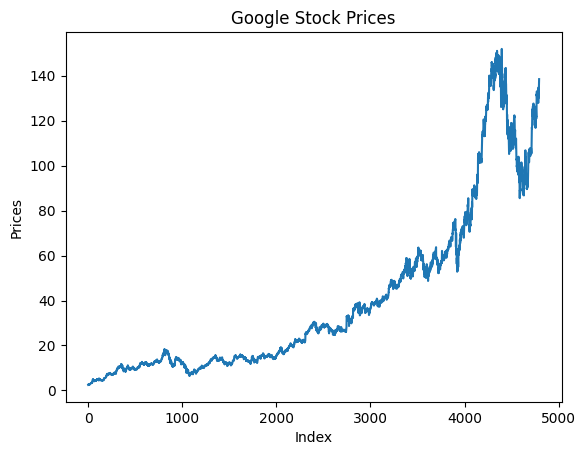

In [36]:
import matplotlib.pyplot as plt

# Criando o gráfico
plt.plot(google)

# Adicionando título e rótulos aos eixos
plt.title('Google Stock Prices')
plt.xlabel('Index')
plt.ylabel('Prices')

plt.show()

## Check for Inclusion with Python's in Keyword
- The `in` keyword checks if a value exists within an object.
- The `in` keyword will look for a value in the **Series's** index.
- Use the `index` and `values` attributes to access "nested" objects within the **Series**.
- Combine the `in` keyword with `values` to search within the **Series's** values.

In [37]:
pokemon.head()


0     Bulbasaur
1       Ivysaur
2      Venusaur
3    Charmander
4    Charmeleon
Name: Name, dtype: object

In [38]:
# ele busca apenas pelo index (coluna de numeros), não nos valores. Por isso vai dar falso:
'Bulbasaur' in pokemon

False

In [39]:
0 in pokemon

True

In [40]:
pokemon.index

RangeIndex(start=0, stop=1010, step=1)

In [41]:
'Bulbasaur' in pokemon.values

True

## The sort_values Method
- The `sort_values` method sorts a **Series** values in order.
- By default, pandas applies an ascending sort (smallest to largest).
- Customize the sort order with the `ascending` parameter.

In [42]:
google.head()

0    2.490664
1    2.515820
2    2.758411
3    2.770615
4    2.614201
Name: Price, dtype: float64

In [43]:
google.sort_values()

10        2.470490
0         2.490664
13        2.509095
11        2.514326
1         2.515820
           ...    
4336    150.000000
4341    150.000000
4346    150.141754
4345    151.000000
4395    151.863495
Name: Price, Length: 4793, dtype: float64

In [44]:
sorted(google)

[2.47049,
 2.490664,
 2.509095,
 2.514326,
 2.51582,
 2.51582,
 2.530515,
 2.54795,
 2.553678,
 2.557912,
 2.613952,
 2.614201,
 2.622171,
 2.655795,
 2.676219,
 2.692408,
 2.753679,
 2.758411,
 2.770615,
 2.798012,
 2.849818,
 2.912832,
 2.92404,
 2.959906,
 2.977838,
 2.984065,
 3.012209,
 3.021176,
 3.155672,
 3.235373,
 3.257789,
 3.348449,
 3.353929,
 3.368624,
 3.410218,
 3.41221,
 3.425909,
 3.45505,
 3.512086,
 3.566631,
 3.56962,
 3.596519,
 3.60972,
 3.68693,
 3.74845,
 4.096396,
 4.183569,
 4.209721,
 4.211713,
 4.212461,
 4.240356,
 4.241352,
 4.242847,
 4.247579,
 4.250817,
 4.257293,
 4.259036,
 4.288177,
 4.319559,
 4.336247,
 4.354179,
 4.366135,
 4.378588,
 4.383569,
 4.393532,
 4.401004,
 4.402498,
 4.407231,
 4.411714,
 4.420929,
 4.432137,
 4.432635,
 4.433134,
 4.441602,
 4.453557,
 4.461527,
 4.465014,
 4.465014,
 4.480705,
 4.481951,
 4.481951,
 4.492162,
 4.494155,
 4.494404,
 4.499136,
 4.500631,
 4.50088,
 4.508352,
 4.509348,
 4.512586,
 4.525039,
 4.527032,


In [45]:
google.sort_values(ascending=False).head()

4395    151.863495
4345    151.000000
4346    150.141754
4341    150.000000
4336    150.000000
Name: Price, dtype: float64

In [46]:
pokemon.sort_values()

459    Abomasnow
62          Abra
358        Absol
616     Accelgor
680    Aegislash
         ...    
570      Zoroark
569        Zorua
40         Zubat
633     Zweilous
717      Zygarde
Name: Name, Length: 1010, dtype: object

## The sort_index Method
- The `sort_index` method sorts a **Series** by its index.
- The `sort_index` method also accepts an `ascending` parameter to set sort order.

In [47]:
pokemon = pd.read_csv('pokemon.csv', index_col='Name').squeeze('columns')
pokemon.sort_index()

Name
Abomasnow        Grass, Ice
Abra                Psychic
Absol                  Dark
Accelgor                Bug
Aegislash      Steel, Ghost
                  ...      
Zoroark                Dark
Zorua                  Dark
Zubat        Poison, Flying
Zweilous       Dark, Dragon
Zygarde      Dragon, Ground
Name: Type, Length: 1010, dtype: object

In [48]:
'Pikachu' in pokemon.index
'Pikachu' in pokemon

True

## Extract Series Value by Index Position
- Use the `iloc` accessor to extract a **Series** value by its index position.
- `iloc` is short for "index location".
- Python's list slicing syntaxes (slices, slices from start, slices to end, etc.) are supported with **Series** objects.

In [49]:
pokemon = pd.read_csv('pokemon.csv', usecols=['Name']).squeeze('columns')
pokemon.head()

0     Bulbasaur
1       Ivysaur
2      Venusaur
3    Charmander
4    Charmeleon
Name: Name, dtype: object

In [50]:
pokemon.iloc[[10,20,30,40,50]]

10      Metapod
20      Spearow
30    Nidoqueen
40        Zubat
50      Dugtrio
Name: Name, dtype: object

In [51]:
pokemon.iloc[15:30]

15       Pidgey
16    Pidgeotto
17      Pidgeot
18      Rattata
19     Raticate
20      Spearow
21       Fearow
22        Ekans
23        Arbok
24      Pikachu
25       Raichu
26    Sandshrew
27    Sandslash
28     Nidoran♀
29     Nidorina
Name: Name, dtype: object

In [52]:
pokemon.iloc[700:]

700         Hawlucha
701          Dedenne
702          Carbink
703            Goomy
704          Sliggoo
            ...     
1005    Iron Valiant
1006        Koraidon
1007        Miraidon
1008    Walking Wake
1009     Iron Leaves
Name: Name, Length: 310, dtype: object

In [53]:
pokemon.iloc[-20:]

990      Iron Bundle
991       Iron Hands
992     Iron Jugulis
993        Iron Moth
994      Iron Thorns
995         Frigibax
996         Arctibax
997       Baxcalibur
998       Gimmighoul
999        Gholdengo
1000        Wo-Chien
1001       Chien-Pao
1002         Ting-Lu
1003          Chi-Yu
1004    Roaring Moon
1005    Iron Valiant
1006        Koraidon
1007        Miraidon
1008    Walking Wake
1009     Iron Leaves
Name: Name, dtype: object

## Extract Series Value by Index Label
- Use the `loc` accessor to extract a **Series** value by its index label.
- Pass a list to extract multiple values by index label.
- If one index label/position in the list does not exist, Pandas will raise an error.

In [54]:
pokemon = pd.read_csv('pokemon.csv', index_col=['Name']).squeeze('columns')
pokemon

Name
Bulbasaur          Grass, Poison
Ivysaur            Grass, Poison
Venusaur           Grass, Poison
Charmander                  Fire
Charmeleon                  Fire
                      ...       
Iron Valiant     Fairy, Fighting
Koraidon        Fighting, Dragon
Miraidon        Electric, Dragon
Walking Wake       Water, Dragon
Iron Leaves       Grass, Psychic
Name: Type, Length: 1010, dtype: object

In [55]:
pokemon.loc['Bulbasaur']

'Grass, Poison'

In [56]:
pokemon.loc[['Charizard','Jolteon','Meowth']]

Name
Charizard    Fire, Flying
Jolteon          Electric
Meowth             Normal
Name: Type, dtype: object

In [57]:
guitars_dict = {
    "Fender Telecaster": "Baby Blue",
    "Gibson Les Paul": "Sunburst",
    "ESP Eclipse": "Dark Green"
}

guitars = pd.Series(guitars_dict)
guitars

Fender Telecaster     Baby Blue
Gibson Les Paul        Sunburst
ESP Eclipse          Dark Green
dtype: object

In [58]:
# guitars.iloc[0]
guitars.values[0]


'Baby Blue'

In [59]:
guitars.loc[['Gibson Les Paul']].values

array(['Sunburst'], dtype=object)

In [60]:
guitars.loc[['ESP Eclipse']].values

array(['Dark Green'], dtype=object)

## The get Method on a Series
- The `get` method extracts a **Series** value by index label. It is an alternative option to square brackets.
- The `get` method's second argument sets the fallback value to return if the label/position does not exist.

In [61]:
pokemon.get('Moltres')

'Fire, Flying'

In [62]:
pokemon.loc['Moltres']

'Fire, Flying'

In [63]:
# procura por digimon. Se não achar, retorna o que há em default (None é o default do Pandas)
pokemon.get('Digimon')


In [64]:
pokemon.get(['Pikachu','Moltres'], default= 'Não localizado')

Name
Pikachu        Electric
Moltres    Fire, Flying
Name: Type, dtype: object

In [65]:
# Irá dar erro, pois acha nada.
# pokemon.loc['Moltres']

## Overwrite a Series Value
- Use the `loc/iloc` accessor to target an index label/position, then use an equal sign to provide a new value.

In [66]:
pokemon = pd.read_csv('pokemon.csv', usecols=['Name']).squeeze('columns')
pokemon.iloc[0] = 'Bubussauro'
pokemon.head()

0    Bubussauro
1       Ivysaur
2      Venusaur
3    Charmander
4    Charmeleon
Name: Name, dtype: object

In [67]:
pokemon.iloc[[10,20,30]] = ['Fogomon','Aguamon', 'Ventomon']

In [68]:
pokemon.iloc[[10,20,30]]

10     Fogomon
20     Aguamon
30    Ventomon
Name: Name, dtype: object

In [69]:
pokemon = pd.read_csv('pokemon.csv', index_col='Name').squeeze('columns')
pokemon.head()

Name
Bulbasaur     Grass, Poison
Ivysaur       Grass, Poison
Venusaur      Grass, Poison
Charmander             Fire
Charmeleon             Fire
Name: Type, dtype: object

In [70]:
pokemon.loc['Bulbasaur'] = 'Plata, Agua'
pokemon.head()

Name
Bulbasaur       Plata, Agua
Ivysaur       Grass, Poison
Venusaur      Grass, Poison
Charmander             Fire
Charmeleon             Fire
Name: Type, dtype: object

In [71]:
pokemon.loc['Pikachu']

'Electric'

## The copy Method
- A **copy** is a duplicate/replica of an object.
- Changes to a copy do not modify the original object.
- A **view** is a different way of looking at the *same* data.
- Changes to a view *do* modify the original object.
- The `copy` method creates a copy of a pandas object.

In [77]:
pokemon_df = pd.read_csv('pokemon.csv', usecols=['Name'])
pokemon_series = pokemon_df.squeeze('columns')

In [78]:
pokemon_df

,Name
0,Bulbasaur
1,Ivysaur
2,Venusaur
3,Charmander
4,Charmeleon
...,...
1005,Iron Valiant
1006,Koraidon
1007,Miraidon
1008,Walking Wake


In [80]:
pokemon_series[0] = 'Bulbassauro'

In [84]:
pokemon_series.iloc[0]

'Bulbassauro'

In [85]:
pokemon_df.iloc[0]

Name    Bulbassauro
Name: 0, dtype: object

In [86]:
pokemon_df = pd.read_csv('pokemon.csv', usecols=['Name'])
pokemon_series = pokemon_df.squeeze('columns').copy()

In [87]:
pokemon_series[0] = 'Bulbassauro'

In [91]:
pokemon_series.iloc[0]

'Bulbassauro'

In [92]:
pokemon_df.iloc[0]

Name    Bulbasaur
Name: 0, dtype: object

## Math Methods on Series Objects
- The `count` method returns the number of values in the **Series**. It excludes missing values; the `size` attribute includes missing values.
- The `sum` method adds together the **Series's** values.
- The `product` method multiplies together the **Series's** values.
- The `mean` method calculates the average of the **Series's** values.
- The `std` method calculates the standard deviation of the **Series's** values.
- The `max` method returns the largest value in the **Series**.
- The `min` method returns the smallest value in the **Series**.
- The `median` method returns the median of the **Series** (the value in the middle).
- The `mode` method returns the mode of the **Series** (the most frequent alue).
- The `describe` method returns a summary with various mathematical calculations.

In [93]:
google = pd.read_csv('google_stock_price.csv', usecols=["Price"]).squeeze('columns')
google.head()

0    2.490664
1    2.515820
2    2.758411
3    2.770615
4    2.614201
Name: Price, dtype: float64

In [94]:
google.count()

np.int64(4793)

In [95]:
google.size

4793

In [ ]:
# Serie muito grande para calcular o produto para o Pandas
google.product()

c:\Users\f0fp0228\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:57: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)


np.float64(inf)

In [97]:
google.mean()

np.float64(40.211376870018775)

In [98]:
google.max()

np.float64(151.863495)

In [99]:
google.min()

np.float64(2.47049)

In [100]:
# mediana
google.median()

np.float64(26.327717)

In [102]:
# std: desvio padrão
google.describe()

count    4793.000000
mean       40.211377
std        37.274753
min         2.470490
25%        12.767395
50%        26.327717
75%        56.311001
max       151.863495
Name: Price, dtype: float64

## Broadcasting
- **Broadcasting** describes the process of applying an arithmetic operation to an array (i.e., a **Series**).
- We can combine mathematical operators with a **Series** to apply the mathematical operation to every value.
- There are also methods to accomplish the same results (`add`, `sub`, `mul`, `div`, etc.)

In [119]:
google = pd.read_csv('google_stock_price.csv', usecols=['Price']).squeeze('columns')
google.head()

0    2.490664
1    2.515820
2    2.758411
3    2.770615
4    2.614201
Name: Price, dtype: float64

In [120]:
# Adiciona 10 a cada célula
google.add(10)

0        12.490664
1        12.515820
2        12.758411
3        12.770615
4        12.614201
           ...    
4788    142.080002
4789    142.998001
4790    145.570007
4791    147.050003
4792    148.429993
Name: Price, Length: 4793, dtype: float64

In [121]:
google + 10

0        12.490664
1        12.515820
2        12.758411
3        12.770615
4        12.614201
           ...    
4788    142.080002
4789    142.998001
4790    145.570007
4791    147.050003
4792    148.429993
Name: Price, Length: 4793, dtype: float64

In [122]:
google.sub(10)

0        -7.509336
1        -7.484180
2        -7.241589
3        -7.229385
4        -7.385799
           ...    
4788    122.080002
4789    122.998001
4790    125.570007
4791    127.050003
4792    128.429993
Name: Price, Length: 4793, dtype: float64

In [123]:
google.mul(1.8)

0         4.483195
1         4.528476
2         4.965140
3         4.987107
4         4.705562
           ...    
4788    237.744004
4789    239.396402
4790    244.026013
4791    246.690005
4792    249.173987
Name: Price, Length: 4793, dtype: float64

In [124]:
google.div(2.5)

0        0.996266
1        1.006328
2        1.103364
3        1.108246
4        1.045680
          ...    
4788    52.832001
4789    53.199200
4790    54.228003
4791    54.820001
4792    55.371997
Name: Price, Length: 4793, dtype: float64

## The value_counts Method
- The `value_counts` method returns the number of times each unique value occurs in the **Series**.
- The `normalize` parameter returns the relative frequencies/percentages of the values instead of the counts.

In [130]:
pokemon = pd.read_csv('pokemon.csv', index_col='Name').squeeze('columns')
pokemon

Name
Bulbasaur          Grass, Poison
Ivysaur            Grass, Poison
Venusaur           Grass, Poison
Charmander                  Fire
Charmeleon                  Fire
                      ...       
Iron Valiant     Fairy, Fighting
Koraidon        Fighting, Dragon
Miraidon        Electric, Dragon
Walking Wake       Water, Dragon
Iron Leaves       Grass, Psychic
Name: Type, Length: 1010, dtype: object

In [126]:
pokemon.value_counts()

Type
Water               74
Normal              74
Grass               46
Psychic             39
Fire                36
                    ..
Rock, Electric       1
Dark, Ground         1
Dragon, Dark         1
Fairy, Fighting      1
Fighting, Dragon     1
Name: count, Length: 200, dtype: int64

In [129]:
# porcentagem de cada valor
pokemon.value_counts(normalize=True) * 100

Type
Water               7.326733
Normal              7.326733
Grass               4.554455
Psychic             3.861386
Fire                3.564356
                      ...   
Rock, Electric      0.099010
Dark, Ground        0.099010
Dragon, Dark        0.099010
Fairy, Fighting     0.099010
Fighting, Dragon    0.099010
Name: proportion, Length: 200, dtype: float64

## The apply Method
- The `apply` method accepts a function. It invokes that function on every `Series` value.

In [134]:
pokemon = pd.read_csv('pokemon.csv', usecols=['Name']).squeeze('columns')
pokemon.head()

0     Bulbasaur
1       Ivysaur
2      Venusaur
3    Charmander
4    Charmeleon
Name: Name, dtype: object

In [136]:
pokemon.apply(len)

0        9
1        7
2        8
3       10
4       10
        ..
1005    12
1006     8
1007     8
1008    12
1009    11
Name: Name, Length: 1010, dtype: int64

In [139]:
def count_of_a(pokemon):
    return pokemon.count('a')
pokemon.apply(count_of_a)

0       2
1       1
2       1
3       2
4       1
       ..
1005    2
1006    1
1007    1
1008    2
1009    1
Name: Name, Length: 1010, dtype: int64

In [141]:
pokemon.count()

np.int64(1010)

## The map Method
- The `map` method "maps" or connects each **Series** values to another value.
- We can pass the method a dictionary or a **Series**. Both types connects keys to values.
- The `map` method uses our argument to connect or bridge together the values.

In [149]:
pokemon = pd.read_csv('pokemon.csv', index_col=['Name']).squeeze('columns')
pokemon.head()

Name
Bulbasaur     Grass, Poison
Ivysaur       Grass, Poison
Venusaur      Grass, Poison
Charmander             Fire
Charmeleon             Fire
Name: Type, dtype: object

In [150]:
attack_power = {
    "Grass": 10,
    "Fire": 15,
    'Water': 15,
    'Fairy, Fighting': 20,
    'Grass, Psychic': 50
}

In [151]:
pokemon.map(attack_power)

Name
Bulbasaur        NaN
Ivysaur          NaN
Venusaur         NaN
Charmander      15.0
Charmeleon      15.0
                ... 
Iron Valiant    20.0
Koraidon         NaN
Miraidon         NaN
Walking Wake     NaN
Iron Leaves     50.0
Name: Type, Length: 1010, dtype: float64

In [152]:
attack_power = pd.Series(attack_power)
attack_power.head()

Grass              10
Fire               15
Water              15
Fairy, Fighting    20
Grass, Psychic     50
dtype: int64

In [153]:
pokemon.map(attack_power)

Name
Bulbasaur        NaN
Ivysaur          NaN
Venusaur         NaN
Charmander      15.0
Charmeleon      15.0
                ... 
Iron Valiant    20.0
Koraidon         NaN
Miraidon         NaN
Walking Wake     NaN
Iron Leaves     50.0
Name: Type, Length: 1010, dtype: float64